In [1]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import SpectralClustering, KMeans
from scipy.sparse import linalg, eye
from pyamg import smoothed_aggregation_solver
from sklearn import neighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
X = pd.read_csv('Moon_data.csv', names = ['x','y'])[1:].to_numpy()
t = pd.read_csv('Moon_label.csv').to_numpy()

In [3]:
StdScaler = StandardScaler()
X_std = StdScaler.fit_transform(X)

In [4]:
# create sample dataset, model
#X, t = make_swiss_roll(n_samples=1600, noise=0.3, random_state=23)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=23)
se = SpectralEmbedding(n_components=2, random_state=23)

lle.fit(X)
se.fit(X_std)

SpectralEmbedding(random_state=23)

NameError: name 'fig' is not defined

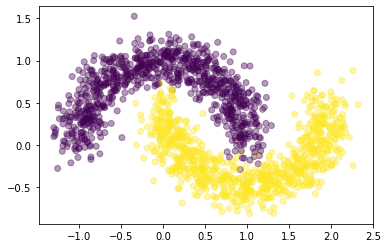

In [5]:
plt.scatter(X[:,0], X[:,1], c = t, alpha=0.4)
fig.set_size_inches(14,6)

fig.savefig("Moon_data.png",dpi=400)
plt.show()

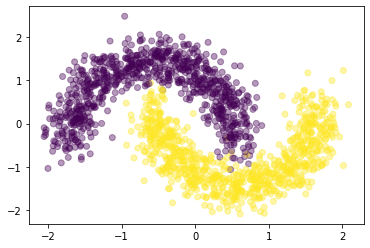

In [6]:
plt.scatter(X_std[:,0], X_std[:,1], c = t, alpha=0.4)
plt.show()

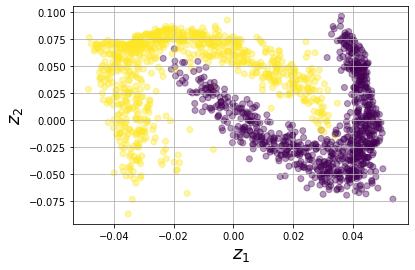

In [7]:
X_lle_compression = lle.transform(X_std)

plt.scatter(X_lle_compression[:, 0], X_lle_compression[:, 1], c=t, alpha=0.4)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

In [48]:
lle4 = LocallyLinearEmbedding(n_components=2, n_neighbors=4, random_state=23)
lle6 = LocallyLinearEmbedding(n_components=2, n_neighbors=6, random_state=23)
lle8 = LocallyLinearEmbedding(n_components=2, n_neighbors=8, random_state=23)
lle10 = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=23)
lle12 = LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=23)
lle14 = LocallyLinearEmbedding(n_components=2, n_neighbors=14, random_state=23)
lle16 = LocallyLinearEmbedding(n_components=2, n_neighbors=16, random_state=23)
lle18 = LocallyLinearEmbedding(n_components=2, n_neighbors=18, random_state=23)

X_lle4 = lle4.fit_transform(X)
X_lle6 = lle6.fit_transform(X)
X_lle8 = lle8.fit_transform(X)
X_lle10 = lle10.fit_transform(X)
X_lle12 = lle12.fit_transform(X)
X_lle14 = lle14.fit_transform(X)
X_lle16 = lle16.fit_transform(X)
X_lle18 = lle16.fit_transform(X)

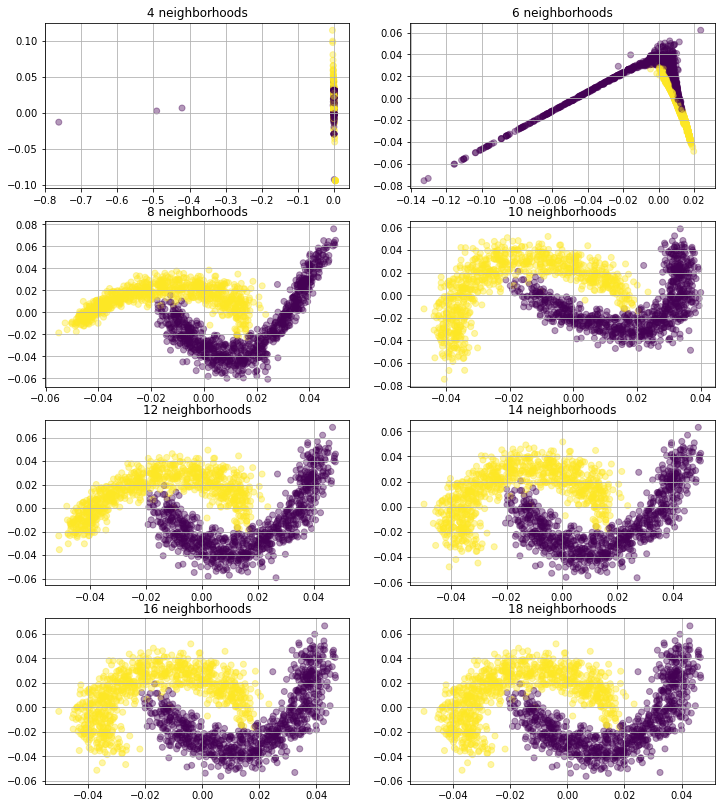

In [49]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
plt.title('4 neighborhoods')
plt.scatter(X_lle4[:, 0], X_lle4[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('6 neighborhoods')
plt.scatter(X_lle6[:, 0], X_lle6[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('8 neighborhoods')
plt.scatter(X_lle8[:, 0], X_lle8[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('10 neighborhoods')
plt.scatter(X_lle10[:, 0], X_lle10[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('12 neighborhoods')
plt.scatter(X_lle12[:, 0], X_lle12[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('14 neighborhoods')
plt.scatter(X_lle14[:, 0], X_lle14[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('16 neighborhoods')
plt.scatter(X_lle16[:, 0], X_lle16[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('18 neighborhoods')
plt.scatter(X_lle18[:, 0], X_lle18[:, 1], c=t, alpha=0.4)
plt.grid(True)
plt.savefig("n_neighbor_LLE.png",dpi=400)
plt.show()

(1600, 2)


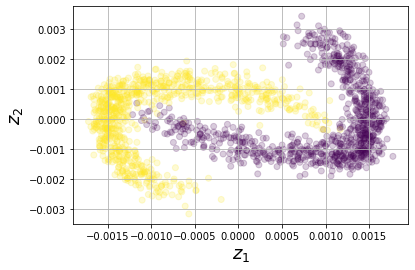

In [8]:
se = SpectralEmbedding(affinity="rbf")
X_se_compression = se.fit_transform(X_std)
print(X_se_compression.shape)
plt.scatter(X_se_compression[:, 0], X_se_compression[:, 1], c=t, alpha=0.2)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

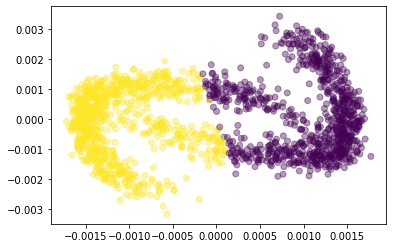

In [9]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_se_compression)

plt.scatter(X_se_compression[:,0], X_se_compression[:,1], c = se_pred, alpha=0.4)

plt.show()

NameError: name 'fig' is not defined

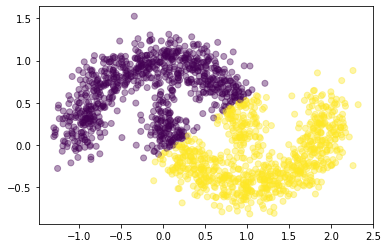

In [10]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
fig.set_size_inches(14,6)

plt.show()

(1600, 2)


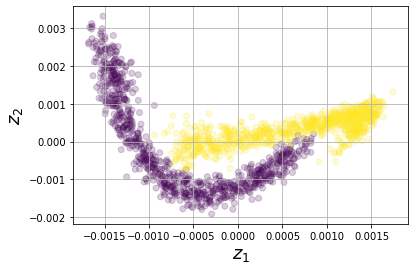

In [11]:
se = SpectralEmbedding(affinity="rbf")     # rbf is similar with ϵ-ball but a gaussian version. 
X_se_compression = se.fit_transform(X)
X_comp_refine = np.delete(X_se_compression,np.where(X_se_compression>0.5)[0],0)
t_comp_refine = np.delete(t,np.where(X_se_compression>0.5)[0],0)
print(X_se_compression.shape)
plt.scatter(X_comp_refine[:, 0], X_comp_refine[:, 1], c=t_comp_refine, alpha=0.2)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

In [60]:
knn = KMeans(n_clusters=4, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_comp_refine)

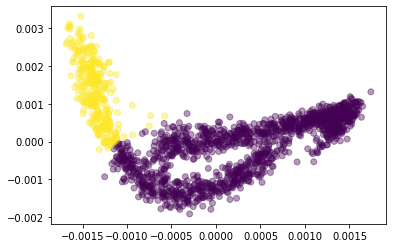

In [62]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_comp_refine)

plt.scatter(X_comp_refine[:,0], X_comp_refine[:,1], c = se_pred, alpha=0.4)

plt.show()

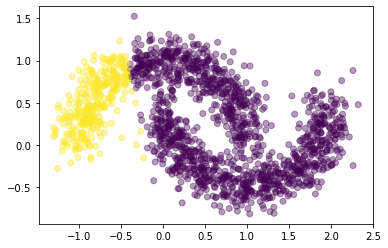

In [64]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
plt.show()

(1600, 2)


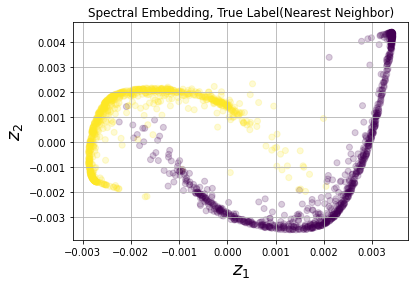

In [27]:
se = SpectralEmbedding(n_neighbors=125, affinity="nearest_neighbors")
X_se_compression = se.fit_transform(X_std)
print(X_se_compression.shape)

plt.title('Spectral Embedding, True Label(Nearest Neighbor)')
plt.scatter(X_se_compression[:, 0], X_se_compression[:, 1], c=t, alpha=0.2)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.savefig("n_neighbor_Spectral(TrueLabel).png", dpi=400)
plt.show()

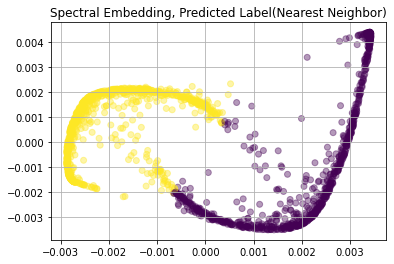

In [30]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
se_pred = knn.fit_predict(X_se_compression)

plt.title('Spectral Embedding, Predicted Label(Nearest Neighbor)')
plt.scatter(X_se_compression[:,0], X_se_compression[:,1], c = se_pred, alpha=0.4)
plt.grid(True)

plt.savefig("n_neighbor_Spectral(PredLabel).png", dpi=400)
plt.show()

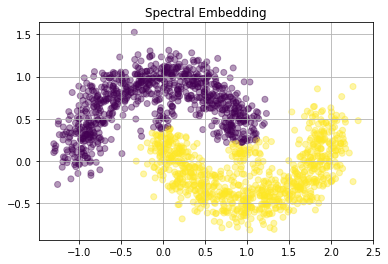

In [31]:
plt.scatter(X[:,0], X[:,1], c = se_pred, alpha=0.4)
plt.title('Spectral Embedding')
plt.grid(True)

plt.savefig("n_neighbor_Spectral(OriginalPlot).png", dpi=400)
plt.show()

In [20]:
se4_1 = SpectralEmbedding(n_neighbors=4, random_state=23, affinity="nearest_neighbors")
se6_1 = SpectralEmbedding(n_neighbors=6, random_state=23, affinity="nearest_neighbors")
se18_1 = SpectralEmbedding(n_neighbors=18, random_state=23, affinity="nearest_neighbors")
se50_1 = SpectralEmbedding(n_neighbors=50, random_state=23, affinity="nearest_neighbors")
se75_1 = SpectralEmbedding(n_neighbors=75, random_state=23, affinity="nearest_neighbors")
se100_1 = SpectralEmbedding(n_neighbors=100, random_state=23, affinity="nearest_neighbors")
se125_1 = SpectralEmbedding(n_neighbors=125, random_state=23, affinity="nearest_neighbors")
se200_1 = SpectralEmbedding(n_neighbors=200, random_state=23, affinity="nearest_neighbors")

X_se4_1 = se4_1.fit_transform(X_std)
X_se6_1 = se6_1.fit_transform(X_std)
X_se18_1 = se18_1.fit_transform(X_std)
X_se50_1 = se50_1.fit_transform(X_std)
X_se75_1 = se75_1.fit_transform(X_std)
X_se100_1 = se100_1.fit_transform(X_std)
X_se125_1 = se125_1.fit_transform(X_std)
X_se200_1 = se200_1.fit_transform(X_std)

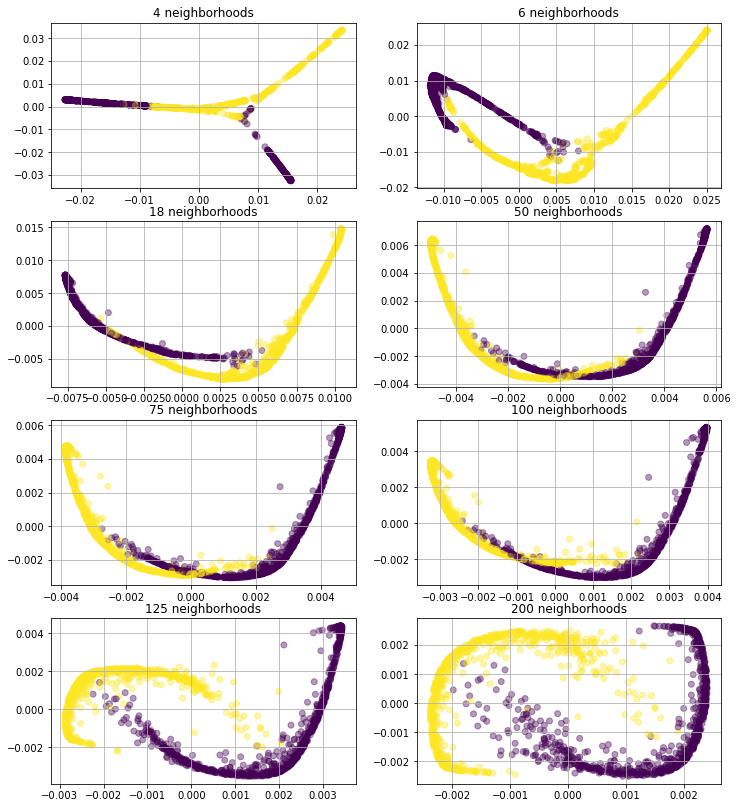

In [22]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
plt.title('4 neighborhoods')
plt.scatter(X_se4_1[:, 0], X_se4_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('6 neighborhoods')
plt.scatter(X_se6_1[:, 0], X_se6_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('18 neighborhoods')
plt.scatter(X_se18_1[:, 0], X_se18_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('50 neighborhoods')
plt.scatter(X_se50_1[:, 0], X_se50_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('75 neighborhoods')
plt.scatter(X_se75_1[:, 0], X_se75_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('100 neighborhoods')
plt.scatter(X_se100_1[:, 0], X_se100_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('125 neighborhoods')
plt.scatter(X_se125_1[:, 0], X_se125_1[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('200 neighborhoods')
plt.scatter(X_se200_1[:, 0], X_se200_1[:, 1], c=t, alpha=0.4)
plt.grid(True)


plt.savefig("n_neighbor_Spectral.png",dpi=400)
plt.show()

In [183]:
lle4_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=4, random_state=23)
lle6_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=6, random_state=23)
lle8_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=8, random_state=23)
lle10_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=10, random_state=23)
lle12_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=12, random_state=23)
lle14_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=14, random_state=23)
lle16_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=16, random_state=23)
lle18_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=18, random_state=23)

X_lle4_1 = lle4_1.fit_transform(X)
X_lle6_1 = lle6_1.fit_transform(X)
X_lle8_1 = lle8_1.fit_transform(X)
X_lle10_1 = lle10_1.fit_transform(X)
X_lle12_1 = lle12_1.fit_transform(X)
X_lle14_1 = lle14_1.fit_transform(X)
X_lle16_1 = lle16_1.fit_transform(X)
X_lle18_1 = lle18_1.fit_transform(X)

In [184]:
X_lle4_1.shape

(1600, 1)

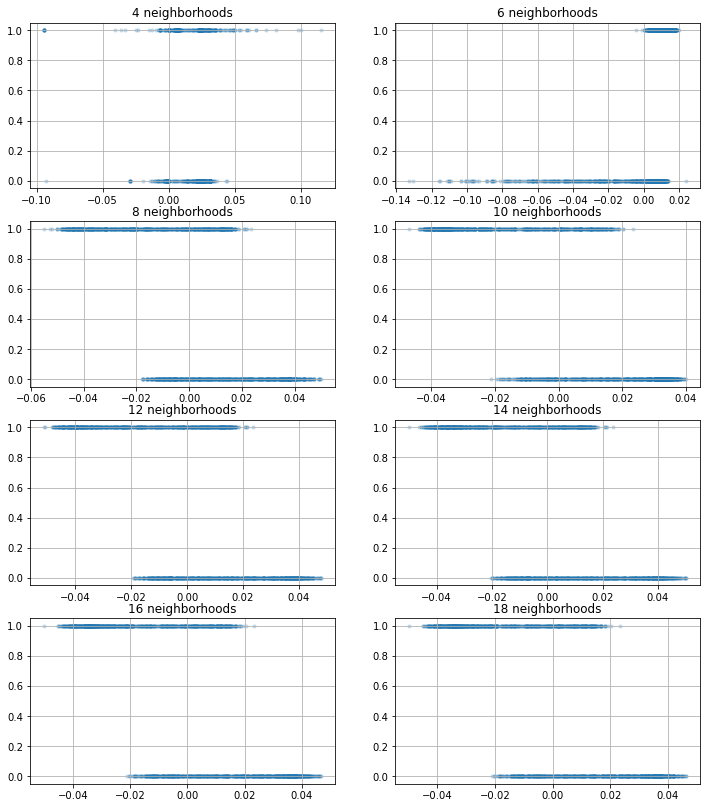

In [189]:
plt.figure(figsize=(12,14))

plt.subplot(4,2,1)
plt.title('4 neighborhoods')
plt.scatter(X_lle4_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('6 neighborhoods')
plt.scatter(X_lle6_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('8 neighborhoods')
plt.scatter(X_lle8_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('10 neighborhoods')
plt.scatter(X_lle10_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('12 neighborhoods')
plt.scatter(X_lle12_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('14 neighborhoods')
plt.scatter(X_lle14_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('16 neighborhoods')
plt.scatter(X_lle16_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('18 neighborhoods')
plt.scatter(X_lle18_1[:,0], t, s=10, alpha=0.2)
plt.grid(True)

plt.show()

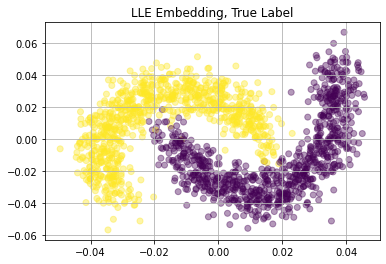

In [181]:
llee = LocallyLinearEmbedding(n_components=2, n_neighbors=20, random_state=23)

X_llee = llee.fit_transform(X)
plt.title('LLE Embedding, True Label')
plt.scatter(X_llee[:, 0], X_llee[:, 1], c=t, alpha=0.4)
plt.grid(True)

plt.savefig("LLE(TrueLabel).png",dpi=400)
plt.show()

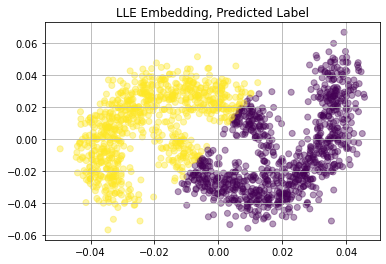

In [182]:
knn = KMeans(n_clusters=2, n_init=100, max_iter=300, tol=0.0001)
lle_pred = knn.fit_predict(X_llee)

plt.title('LLE Embedding, Predicted Label')
plt.scatter(X_llee[:,0], X_llee[:,1], c = lle_pred, alpha=0.4)
plt.grid(True)

plt.savefig("LLE(PredLabel).png",dpi=400)
plt.show()

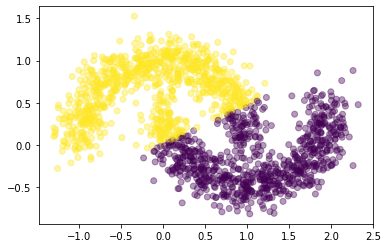

In [180]:
plt.scatter(X[:,0], X[:,1], c = lle_pred, alpha=0.4)
plt.show()

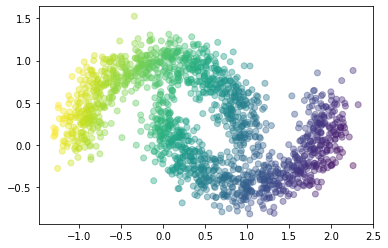

In [188]:
lle18_1 = LocallyLinearEmbedding(n_components=1, n_neighbors=18, random_state=23)
X_lle18_1 = lle18_1.fit_transform(X)
plt.scatter(X[:,0], X[:,1], c = X_lle18_1, alpha=0.4)
plt.show()